In [30]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [111]:
electricity_data_explorer=pd.read_csv('/Users/bryan/code/VonRiecken/raw_data/Electricity_Data_Explorer.csv')
electricity_data_explorer

,Country,Time,Balance,Product,Value,Unit
0,Australia,July 2023,Net Electricity Production,Electricity,22460.2248,GWh
1,Australia,July 2023,Net Electricity Production,Total Combustible Fuels,15153.4307,GWh
2,Australia,July 2023,Net Electricity Production,"Coal, Peat and Manufactured Gases",10684.9635,GWh
3,Australia,July 2023,Net Electricity Production,Oil and Petroleum Products,360.4031,GWh
4,Australia,July 2023,Net Electricity Production,Natural Gas,3848.6375,GWh
...,...,...,...,...,...,...
134466,IEA Total,January 2010,Total Imports,Electricity,34846.5580,GWh
134467,IEA Total,January 2010,Total Exports,Electricity,32372.5830,GWh
134468,IEA Total,January 2010,Used for pumped storage,Electricity,6869.2530,GWh
134469,IEA Total,January 2010,Distribution Losses,Electricity,62000.7330,GWh


#### Linear regression

In [112]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
df = electricity_data_explorer

# Convert the 'Product' column to a binary variable indicating if it's renewable
df['IsRenewable'] = df['Product'].apply(lambda x: 1 if 'Renewable' in x else 0)

# Convert 'Value' column to numeric
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Drop rows with NaN values in the 'Value' column
df = df.dropna(subset=['Value'])
df

,Country,Time,Balance,Product,Value,Unit,IsRenewable
0,Australia,July 2023,Net Electricity Production,Electricity,22460.2248,GWh,0
1,Australia,July 2023,Net Electricity Production,Total Combustible Fuels,15153.4307,GWh,0
2,Australia,July 2023,Net Electricity Production,"Coal, Peat and Manufactured Gases",10684.9635,GWh,0
3,Australia,July 2023,Net Electricity Production,Oil and Petroleum Products,360.4031,GWh,0
4,Australia,July 2023,Net Electricity Production,Natural Gas,3848.6375,GWh,0
...,...,...,...,...,...,...,...
134466,IEA Total,January 2010,Total Imports,Electricity,34846.5580,GWh,0
134467,IEA Total,January 2010,Total Exports,Electricity,32372.5830,GWh,0
134468,IEA Total,January 2010,Used for pumped storage,Electricity,6869.2530,GWh,0
134469,IEA Total,January 2010,Distribution Losses,Electricity,62000.7330,GWh,0


In [113]:
# Encode categorical columns
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df['Time'] = le.fit_transform(df['Time'])

# one-hot encoding for the 'Balance' column
preprocessor = ColumnTransformer(
    transformers=[
        ('balance', OneHotEncoder(), ['Balance'])
    ],
    remainder='passthrough'
)

# relevant features for the model
features = ['Country', 'Time', 'Balance', 'Value']
X = df[features]
y = df['IsRenewable']

# pipeline with preprocessing and logistic regression
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Cross-validate the model
accuracy = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()

# Print the mean accuracy
print("Mean Accuracy:", accuracy)


Mean Accuracy: 0.8068184353167356


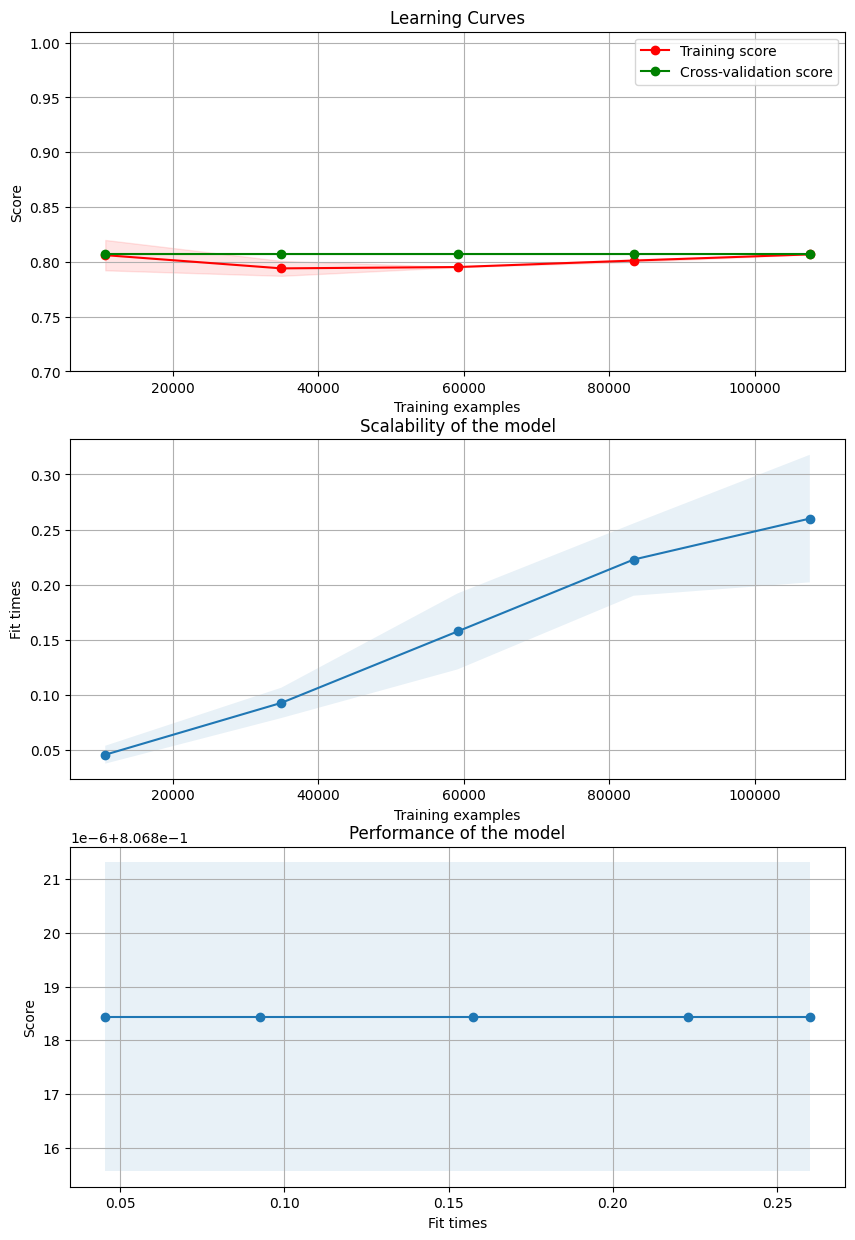

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# function to plot learning curves
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
  
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("Fit times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("Fit times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

# Plot learning curves
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

plot_learning_curve(model, "Learning Curves", X, y, axes=axes, ylim=(0.7, 1.01), cv=5, n_jobs=-1)

plt.show()


#### Reduced training size

In [114]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on a subset of the training data
subset_size = 0.8  # Set this based on the learning curves
X_subset, _, y_subset, _ = train_test_split(X_train, y_train, train_size=subset_size, random_state=42)

# Fit the model on the subset
model.fit(X_subset, y_subset)

# Evaluate the model on the test set
reduced_training_accuracy = model.score(X_test, y_test)

# Print the reduced training accuracy
print("Reduced Training Accuracy:", reduced_training_accuracy)


Reduced Training Accuracy: 0.8090510188903763


### XGBoost Energy output with regard to RE Technology

In [63]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 11.9 MB/s eta 0:00:0000:010:01


In [115]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder


### Reindexing the dataframe

In [152]:
electricity_data_explorer = pd.read_csv('/Users/bryan/code/VonRiecken/raw_data/Electricity_Data_Explorer.csv')
electricity_data_explorer


,Country,Time,Balance,Product,Value,Unit
0,Australia,July 2023,Net Electricity Production,Electricity,22460.2248,GWh
1,Australia,July 2023,Net Electricity Production,Total Combustible Fuels,15153.4307,GWh
2,Australia,July 2023,Net Electricity Production,"Coal, Peat and Manufactured Gases",10684.9635,GWh
3,Australia,July 2023,Net Electricity Production,Oil and Petroleum Products,360.4031,GWh
4,Australia,July 2023,Net Electricity Production,Natural Gas,3848.6375,GWh
...,...,...,...,...,...,...
134466,IEA Total,January 2010,Total Imports,Electricity,34846.5580,GWh
134467,IEA Total,January 2010,Total Exports,Electricity,32372.5830,GWh
134468,IEA Total,January 2010,Used for pumped storage,Electricity,6869.2530,GWh
134469,IEA Total,January 2010,Distribution Losses,Electricity,62000.7330,GWh


In [153]:
products = electricity_data_explorer['Product'].unique()

### Create a list to be used as a filter on specific countries

In [154]:
filter_countries = ['Australia', 'Germany']

### Create a list to be used as a filter on outputs:

In [155]:
filter_balance = ['Net Electricity Production']

### Create a list to be used as a filter on different sources of energy

In [156]:
filter_products = ['Combustible Renewables', 'Hydro', 'Wind', 'Solar',
                   'Total Renewables (Hydro, Geo, Solar, Wind, Other)', 'Other Renewables']

### Reindexing the dataframe

In [159]:
electricity_data_explorer.index = range(len(electricity_data_explorer.index))
electricity_data_explorer

,Country,Time,Balance,Product,Value,Unit
0,Australia,July 2023,Net Electricity Production,Combustible Renewables,259.4267,GWh
1,Australia,July 2023,Net Electricity Production,Hydro,1775.1418,GWh
2,Australia,July 2023,Net Electricity Production,Wind,3216.3408,GWh
3,Australia,July 2023,Net Electricity Production,Solar,2315.3114,GWh
4,Australia,July 2023,Net Electricity Production,"Total Renewables (Hydro, Geo, Solar, Wind, Other)",7566.2207,GWh
...,...,...,...,...,...,...
1721,Germany,January 2010,Net Electricity Production,Combustible Renewables,2367.5750,GWh
1722,Germany,January 2010,Net Electricity Production,Hydro,2078.5300,GWh
1723,Germany,January 2010,Net Electricity Production,Wind,2906.4820,GWh
1724,Germany,January 2010,Net Electricity Production,Solar,423.8320,GWh


In [160]:
electricity_data_explorer = electricity_data_explorer.pivot_table('Value', ['Time','Country', 'Balance'], 'Product')

In [161]:
electricity_data_explorer = electricity_data_explorer.fillna(0)
electricity_data_explorer


Product                                              Combustible Renewables  \
Time           Country   Balance                                              
April 2010     Australia Net Electricity Production                216.2870   
               Germany   Net Electricity Production               2552.1510   
April 2011     Australia Net Electricity Production                165.1840   
               Germany   Net Electricity Production               2818.4370   
April 2012     Australia Net Electricity Production                237.5910   
...                                                                     ...   
September 2020 Germany   Net Electricity Production               3774.0712   
September 2021 Australia Net Electricity Production                258.0133   
               Germany   Net Electricity Production               3581.9108   
September 2022 Australia Net Electricity Production                245.7543   
               Germany   Net Electricity Production               3487.2255   

Product                                                  Hydro  \
Time           Country   Balance                                 
April 2010     Australia Net Electricity Production  1044.4060   
               Germany   Net Electricity Production  1946.7940   
April 2011     Australia Net Electricity Production   911.0370   
               Germany   Net Electricity Production  1667.2520   
April 2012     Australia Net Electricity Production  1207.4340   
...                                                        ...   
September 2020 Germany   Net Electricity Production  1930.8316   
September 2021 Australia Net Electricity Production  1355.8280   
               Germany   Net Electricity Production  2034.2972   
September 2022 Australia Net Electricity Production  1487.2850   
               Germany   Net Electricity Production  1681.1949   

Product                                              Other Renewables  \
Time           Country   Balance                                        
April 2010     Australia Net Electricity Production               0.0   
               Germany   Net Electricity Production               0.0   
April 2011     Australia Net Electricity Production               0.0   
               Germany   Net Electricity Production               0.0   
April 2012     Australia Net Electricity Production               0.0   
...                                                               ...   
September 2020 Germany   Net Electricity Production               0.0   
September 2021 Australia Net Electricity Production               0.0   
               Germany   Net Electricity Production               0.0   
September 2022 Australia Net Electricity Production               0.0   
               Germany   Net Electricity Production               0.0   

Product                                                  Solar  \
Time           Country   Balance                                 
April 2010     Australia Net Electricity Production    26.8110   
               Germany   Net Electricity Production  1366.0630   
April 2011     Australia Net Electricity Production    95.9400   
               Germany   Net Electricity Production  2333.9790   
April 2012     Australia Net Electricity Production   160.2440   
...                                                        ...   
September 2020 Germany   Net Electricity Production  4918.3229   
September 2021 Australia Net Electricity Production  3010.1989   
               Germany   Net Electricity Production  4984.5316   
September 2022 Australia Net Electricity Production  3284.6243   
               Germany   Net Electricity Production  5048.7507   

Product                                              Total Renewables (Hydro, Geo, Solar, Wind, Other)  \
Time           Country   Balance                                                                         
April 2010     Australia Net Electricity Production                                         

In [162]:
electricity_data_explorer = electricity_data_explorer.reset_index()
electricity_data_explorer

Product,Time,Country,Balance,Combustible Renewables,Hydro,Other Renewables,Solar,"Total Renewables (Hydro, Geo, Solar, Wind, Other)",Wind
0,April 2010,Australia,Net Electricity Production,216.2870,1044.4060,0.0,26.8110,1638.0980,350.5110
1,April 2010,Germany,Net Electricity Production,2552.1510,1946.7940,0.0,1366.0630,9011.8470,3145.0560
2,April 2011,Australia,Net Electricity Production,165.1840,911.0370,0.0,95.9400,1680.2160,507.9720
3,April 2011,Germany,Net Electricity Production,2818.4370,1667.2520,0.0,2333.9790,10720.2310,3900.5630
4,April 2012,Australia,Net Electricity Production,237.5910,1207.4340,0.0,160.2440,2037.8080,432.4560
...,...,...,...,...,...,...,...,...,...
321,September 2020,Germany,Net Electricity Production,3774.0712,1930.8316,0.0,4918.3229,16991.2404,6357.3687
322,September 2021,Australia,Net Electricity Production,258.0133,1355.8280,0.0,3010.1989,7080.1002,2456.0600
323,September 2021,Germany,Net Electricity Production,3581.9108,2034.2972,0.0,4984.5316,16364.1116,5751.6605
324,September 2022,Australia,Net Electricity Production,245.7543,1487.2850,0.0,3284.6243,7629.3701,2611.7065


In [163]:
electricity_data_explorer['Time'].min()

'April 2010'

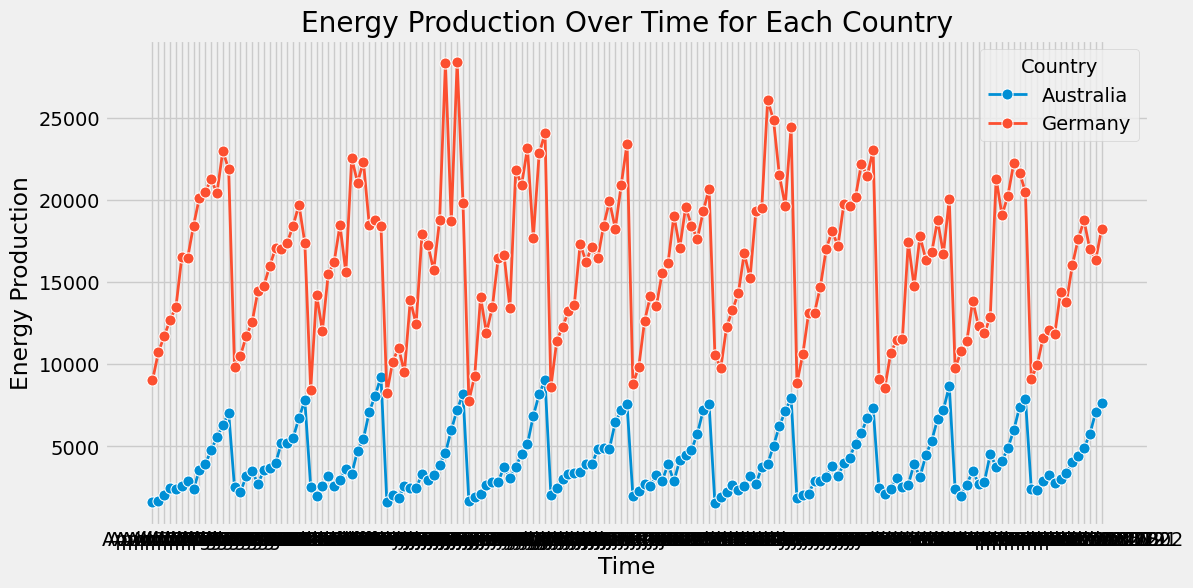

In [164]:
# Create the Seaborn lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='Total Renewables (Hydro, Geo, Solar, Wind, Other)', hue='Country', data=electricity_data_explorer, marker='o', markersize=8, linewidth=2)

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Energy Production')
plt.title('Energy Production Over Time for Each Country')

# Show the legend
plt.legend(title='Country')

# Show the plot
plt.show()

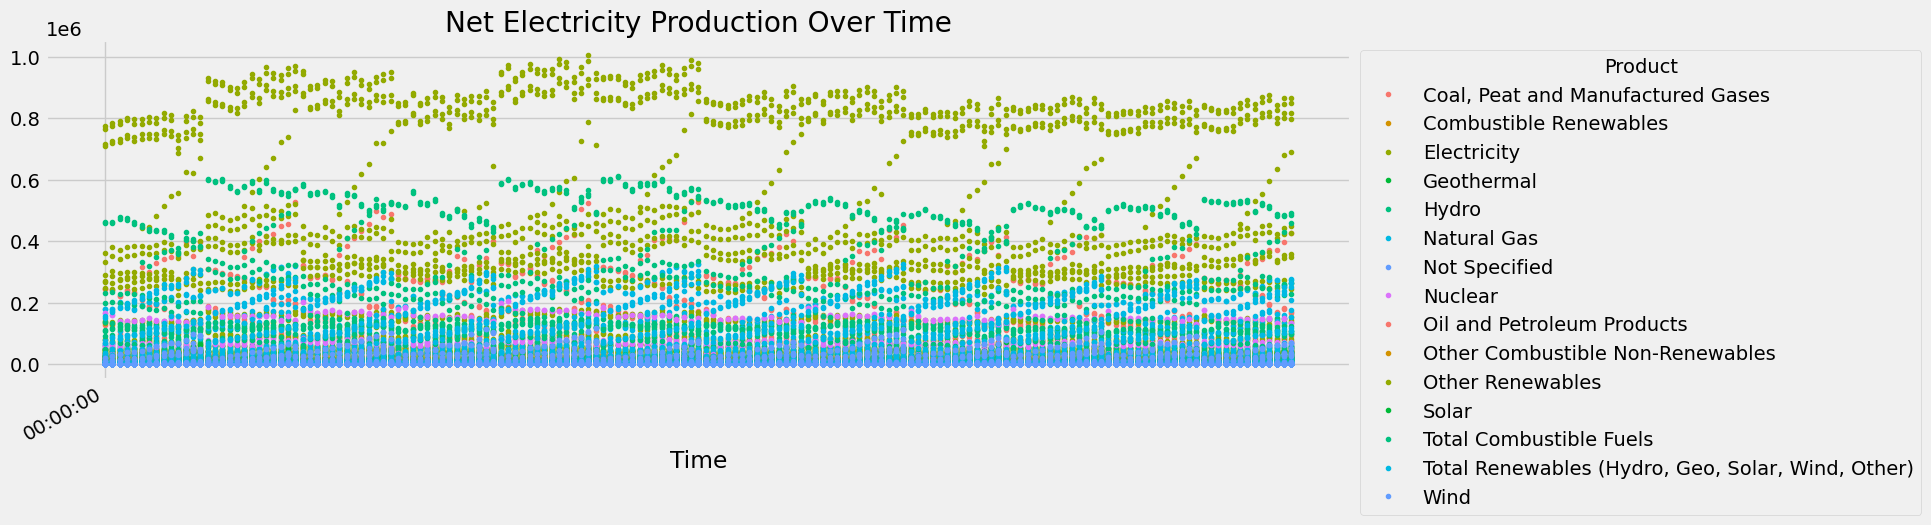

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C17F", "#00B9E3", "#619CFF", "#DB72FB"]

# Assuming 'Time' is in datetime format, otherwise convert it using pd.to_datetime
df['Time'] = pd.to_datetime(df['Time'])

# Group by 'Product' and plot each group separately with a different color
fig, ax = plt.subplots(figsize=(15, 5))
for i, (product, group) in enumerate(df.groupby('Product')):
    group.plot(x='Time', y='Value', style='.', color=color_pal[i % len(color_pal)], label=product, ax=ax)

ax.set_title('Net Electricity Production Over Time')
ax.legend(title='Product', bbox_to_anchor=(1, 1))
plt.show()


### Splitting for test train

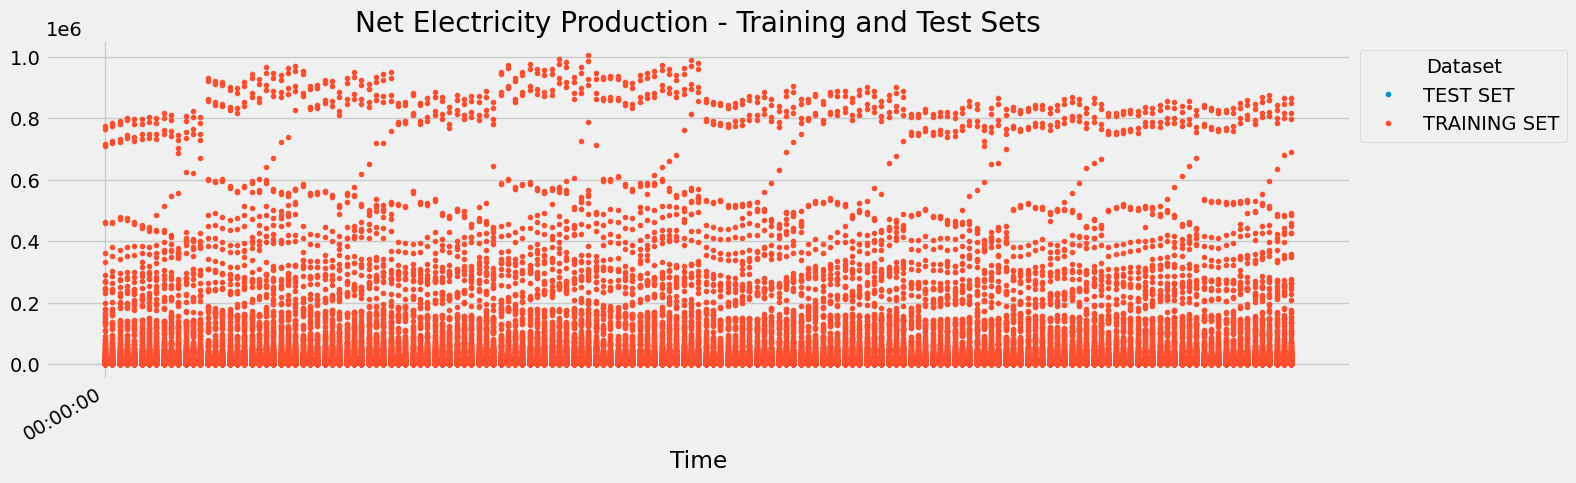

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

split_date = '01-Jan-2015'

# Assuming 'Time' is in datetime format, otherwise convert it using pd.to_datetime
df['Time'] = pd.to_datetime(df['Time'])

# Split the data into training and test sets based on the 'Time' column
df_train = df.loc[df['Time'] <= split_date].copy()
df_test = df.loc[df['Time'] > split_date].copy()

fig, ax = plt.subplots(figsize=(15, 5))
df_test.rename(columns={'Value': 'TEST SET'}).plot(x='Time', y='TEST SET', style='.', ax=ax)
df_train.rename(columns={'Value': 'TRAINING SET'}).plot(x='Time', y='TRAINING SET', style='.', ax=ax)

ax.set_title('Net Electricity Production - Training and Test Sets')
ax.legend(title='Dataset', bbox_to_anchor=(1, 1))
plt.show()


In [171]:
df = electricity_data_explorer

features = ['Combustible Renewables', 'Hydro', 'Wind', 'Solar',
            'Total Renewables (Hydro, Geo, Solar, Wind, Other)', 'Other Renewables']

##df['Time'] = df.index.month
combustible_renewables = df[['Time', 'Country','Combustible Renewables']]
hydro = df[['Time', 'Country','Hydro']]
wind= df[['Time', 'Country','Wind']]
solar = df[['Time', 'Country','Solar']]
total_renewables = df[['Time', 'Country','Total Renewables (Hydro, Geo, Solar, Wind, Other)']]
other_renewables = df[['Time', 'Country','Other Renewables']]

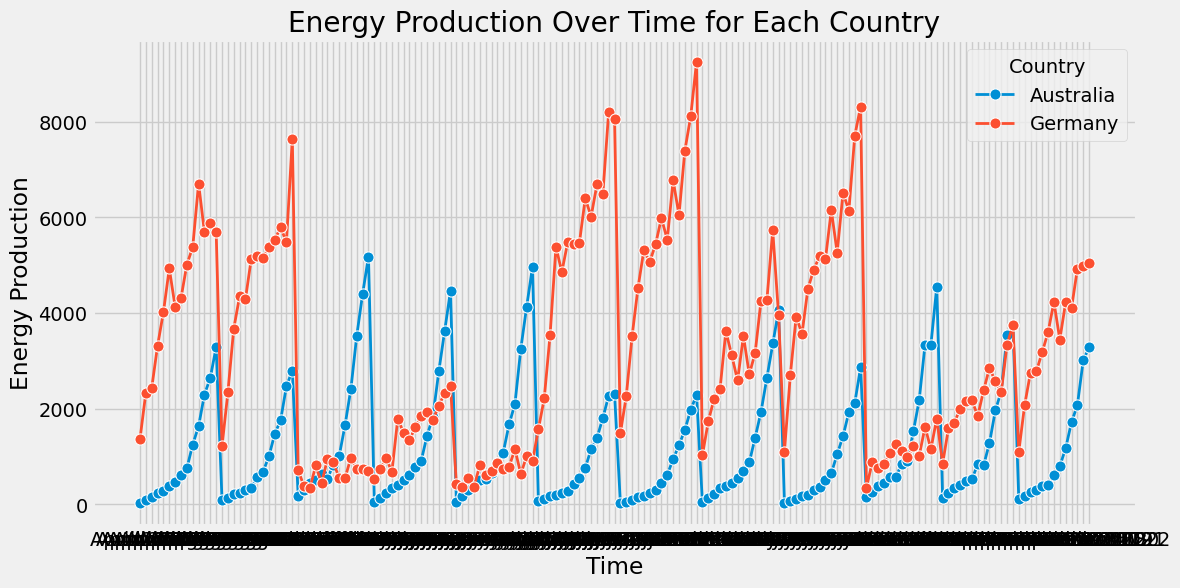

In [166]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='Solar', hue='Country', data=solar, marker='o', markersize=8, linewidth=2)

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Energy Production')
plt.title('Energy Production Over Time for Each Country')

# Show the legend
plt.legend(title='Country')

# Show the plot
plt.show()

In [84]:
df = df.dropna(subset=['Value']) #remove missing values
df

,Country,Time,Balance,Product,Value,Unit
0,Australia,July 2023,Net Electricity Production,Electricity,22460.2248,GWh
1,Australia,July 2023,Net Electricity Production,Total Combustible Fuels,15153.4307,GWh
2,Australia,July 2023,Net Electricity Production,"Coal, Peat and Manufactured Gases",10684.9635,GWh
3,Australia,July 2023,Net Electricity Production,Oil and Petroleum Products,360.4031,GWh
4,Australia,July 2023,Net Electricity Production,Natural Gas,3848.6375,GWh
...,...,...,...,...,...,...
134466,IEA Total,January 2010,Total Imports,Electricity,34846.5580,GWh
134467,IEA Total,January 2010,Total Exports,Electricity,32372.5830,GWh
134468,IEA Total,January 2010,Used for pumped storage,Electricity,6869.2530,GWh
134469,IEA Total,January 2010,Distribution Losses,Electricity,62000.7330,GWh


In [73]:
df['Value'].fillna(df['Value'].mean(), inplace=True) #Replace missing values


In [75]:
# Encode categorical variables if needed
label_encoder = LabelEncoder()
df['Balance'] = label_encoder.fit_transform(df['Balance'])

# data split into features (X) and target variable (y)
X = df.drop('Value', axis=1)
y = df['Value']

# data split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost regressor model
model = XGBRegressor()

# train the model on the training data
model.fit(X_train, y_train)

# predictions on the testing data
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rounded_mse = round(mse, 2)
print(f'Mean Squared Error: {rounded_mse}')

Mean Squared Error: 6318191664.65
